In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import os
os.getcwd()


'C:\\Users\\gaaya\\Prosthetic-Arm-Files'

In [9]:
os.listdir('.')


['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '01_raw_inspection.ipynb',
 'data',
 'Preprocessing-Data.ipynb',
 'README.md']

In [10]:
import pandas as pd

df = pd.read_csv(
    "data/raw/Hand_open.csv",
    skiprows=8,
    header=None,
    engine="python",
    on_bad_lines="skip"
)

df.shape


(2207736, 108)

In [11]:
df.head

<bound method NDFrame.head of               0            1         2            3         4           5    \
0        0.000000   -0.0204776         0   -0.8533325         0   0.1905518   
1        0.000794   -0.0231632   0.00675   -0.8500977   0.00675   0.1902466   
2        0.001588   -0.0209812    0.0135   -0.8408813    0.0135   0.1918945   
3        0.002382   -0.0206455   0.02025    -0.822937   0.02025   0.1988525   
4        0.003177   -0.0258488     0.027   -0.8120117     0.027   0.2078857   
...           ...          ...       ...          ...       ...         ...   
2207731       NaN                                                             
2207732       NaN                                                             
2207733       NaN                                                             
2207734       NaN                                                             
2207735       NaN                                                             

              6      

In [12]:
df.iloc[:10, :3]


,0,1,2
0,0.000000,-0.0204776,0
1,0.000794,-0.0231632,0.00675
2,0.001588,-0.0209812,0.0135
3,0.002382,-0.0206455,0.02025
4,0.003177,-0.0258488,0.027
5,0.003971,-0.0261845,0.03375
6,0.004765,-0.021149,0.0405
7,0.005559,-0.0166171,0.04725
8,0.006353,-0.0196384,0.054
9,0.007147,-0.0218204,0.06075


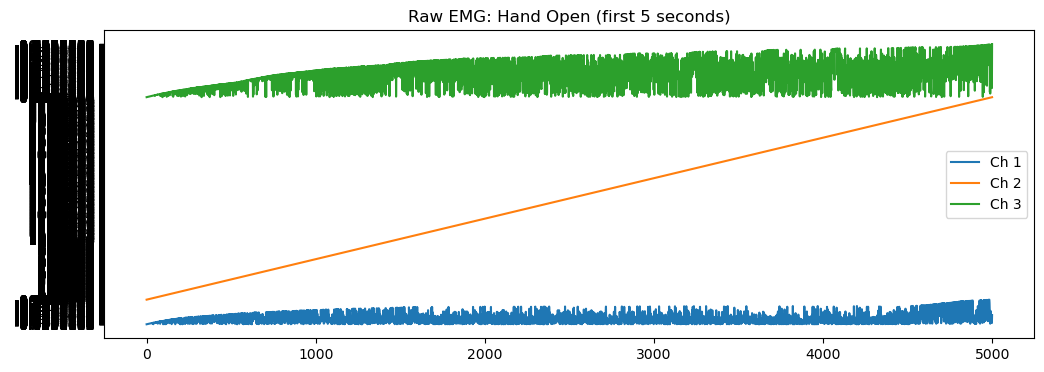

In [13]:
# different emg electrodes (muscle activity)
plt.figure(figsize=(12,4))
plt.plot(df.iloc[:5000, 1], label="Ch 1") # this seems like the emg 1
plt.plot(df.iloc[:5000, 2], label="Ch 2") # time series (s)
plt.plot(df.iloc[:5000, 3], label="Ch 3") #ACRo or gyro signal 
plt.legend()
plt.title("Raw EMG: Hand Open (first 5 seconds)")
plt.show()


In [36]:
# Inspect first 20 columns to see the pattern
df.iloc[:5, :20]

# 0: EMG time, 1: EMG mV, 2: ACC time, 3: ACC X, 4: ACC time, 5: ACC Y, 6: ACC time, 7: ACC Z, 8: GYRO time, 9: GYRO X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,-0.0204776,0,-0.8533325,0,0.1905518,0,-0.5618896,0,-20.7557259,0,1.3587786,0,-5.7022901,0.000000,0.000315,0,-0.0261845,0,0.2814331
1,0.000794,-0.0231632,0.00675,-0.8500977,0.00675,0.1902466,0.00675,-0.5621948,0.00675,-19.8854961,0.00675,-3.2900763,0.00675,-5.5725193,0.000021,0.000297,0.0007941,-0.0263523,0.00675,0.2683716
2,0.001588,-0.0209812,0.0135,-0.8408813,0.0135,0.1918945,0.0135,-0.5568237,0.0135,-18.8244267,0.0135,-9.0839691,0.0135,-5.3664122,0.000042,0.000403,0.0015882,-0.0256809,0.0135,0.2717896
3,0.002382,-0.0206455,0.02025,-0.822937,0.02025,0.1988525,0.02025,-0.5466919,0.02025,-17.3664131,0.02025,-13.9312973,0.02025,-5.3664122,0.000063,0.000314,0.0023824,-0.0182956,0.02025,0.2786865
4,0.003177,-0.0258488,0.027,-0.8120117,0.027,0.2078857,0.027,-0.5445557,0.027,-16.5496178,0.027,-15.8625956,0.027,-5.2366414,0.000083,0.000244,0.0031765,-0.0092317,0.027,0.2808228


In [15]:
emg_cols = list(range(1, df.shape[1], 18))
emg = df.iloc[:, emg_cols].values

print(emg.shape)


(2207736, 6)


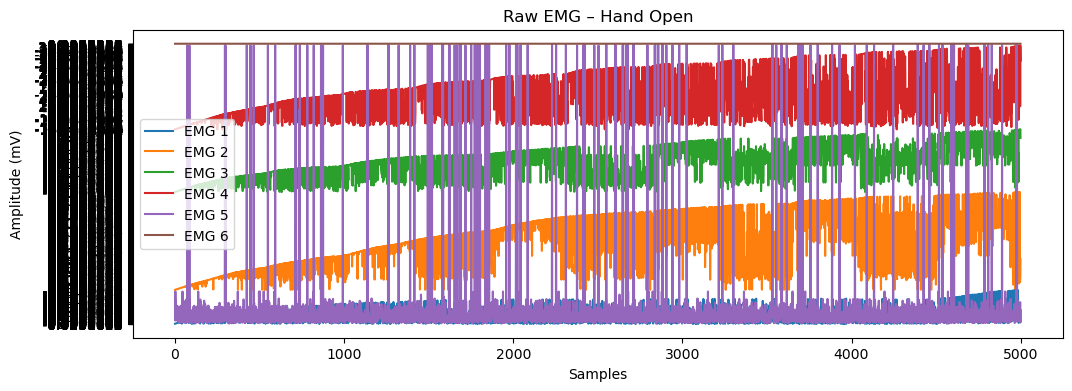

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(emg.shape[1]):
    plt.plot(emg[:5000, i], label=f"EMG {i+1}")

plt.legend()
plt.title("Raw EMG – Hand Open")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.show()


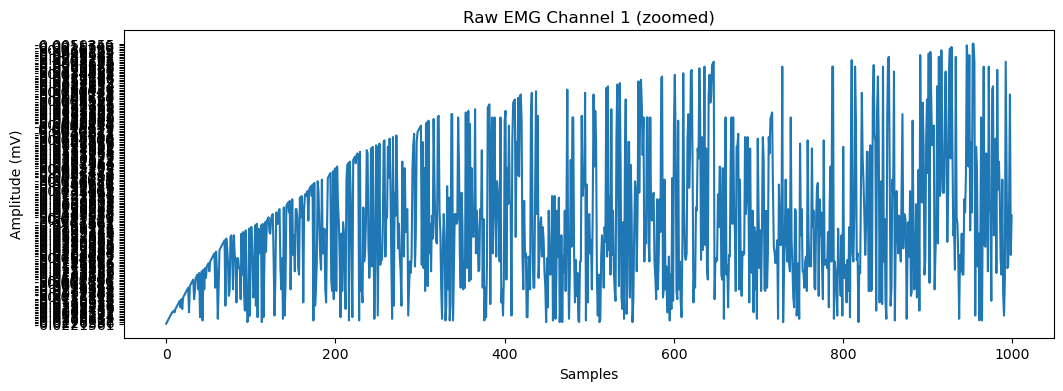

In [17]:
# signal channel zoomed in 

ch = 0  # index
plt.figure(figsize=(12,4))
plt.plot(emg[2000:3000, ch])
plt.title(f"Raw EMG Channel {ch+1} (zoomed)")
plt.xlabel("Samples")
plt.ylabel("Amplitude (mV)")
plt.show()


In [29]:
# skibdi 

In [25]:
import pandas as pd
import numpy as np

# Load raw CSV
df = pd.read_csv(
    "data/raw/Hand_open.csv",
    skiprows=8,
    header=None,
    engine="python",
    on_bad_lines="skip"
)

# Extract EMG amplitude columns (Delsys pattern)
emg_cols = list(range(1, df.shape[1], 18))

emg = (
    df.iloc[:, emg_cols]
    .apply(pd.to_numeric, errors="coerce")
    .to_numpy(dtype=np.float64)
)

# ✅ ONLY drop rows that are completely NaN
emg = emg[~np.isnan(emg).all(axis=1)]

print("EMG shape:", emg.shape)
print("dtype:", emg.dtype)


EMG shape: (57919, 6)
dtype: float64


In [27]:
signal = emg[:, 0]

print("Signal length:", len(signal))
print("Min:", np.nanmin(signal))
print("Max:", np.nanmax(signal))
print("Std:", np.nanstd(signal))


Signal length: 57919
Min: -0.7966125
Max: 0.4335546
Std: 0.03777965517771693


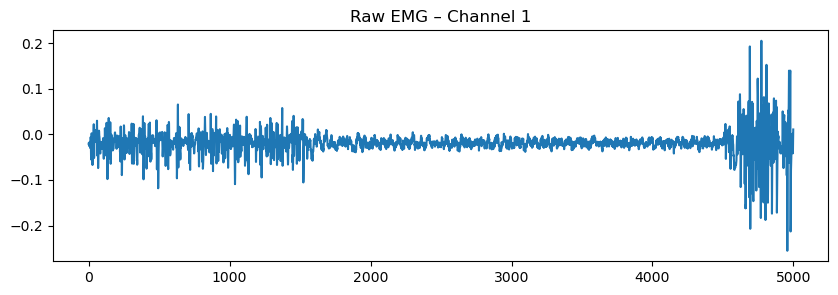

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(signal[:5000])
plt.title("Raw EMG – Channel 1")
plt.show()
